<a href="https://colab.research.google.com/github/PaninaEkaterina/statprak/blob/main/3_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://drive.google.com/file/d/1b7tSyJBpWggHEBGdWa80JdKh7VNq2FEf/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1
Implement serial test and apply to a `samples`

In [2]:
import numpy as np
from scipy import stats
from scipy.integrate import quad
import matplotlib.pyplot as plt


def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 123

n = 1000

samples = np.array([rng() for _ in range(2 * n)])

In [ ]:
re_s = samples.reshape(-1, 2)

k = 20
f_obs = np.histogram2d(re_s[:, 0], re_s[:, 1], bins=[np.linspace(0 , 1, k + 1), np.linspace(0 , 1, k + 1)])[0].flatten()
f_exp = np.full(k**2, n / (k**2))
print(stats.chisquare(f_obs, f_exp))

Power_divergenceResult(statistic=350.4, pvalue=0.9617901045750655)


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [10]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1
def rng_good(m=2**31, a=123456789, c=5555):
    rng_good.current = (a * rng_good.current + c) % m
    return rng_good.current / m
rng_good.current = 1
def pearson_test(samples):
    k = 10
    f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
    f_exp = np.full(k, len(samples) // k)
    return stats.chisquare(f_obs, f_exp)

rng_bad_numbers = [rng_bad() for _ in range(30000)]
rng_good_numbers = [rng_good() for _ in range(30000)]
print("rng_bad:", pearson_test(rng_bad_numbers))
print("rng_good:", pearson_test(rng_good_numbers))

rng_bad: Power_divergenceResult(statistic=17.656, pvalue=0.039380914774432466)
rng_good: Power_divergenceResult(statistic=8.98, pvalue=0.4391224178380654)


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

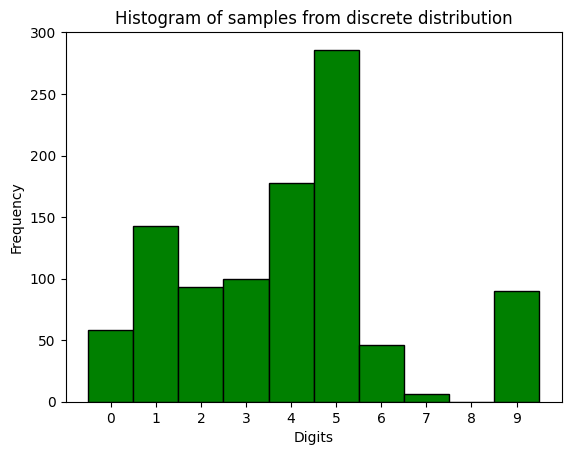

In [ ]:
set_digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights = weights / weights.sum()
sorted_ind = np.argsort(weights)[::-1]
sorted_set_digits = set_digits[sorted_ind]
sorted_weights = weights[sorted_ind]
samples = np.random.choice(sorted_set_digits, size=1000, p=sorted_weights)

plt.hist(samples, bins=np.arange(11) - 0.5, edgecolor='black', color='g')
plt.xticks(range(10))
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.title('Histogram of samples from discrete distribution')
plt.show()


### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

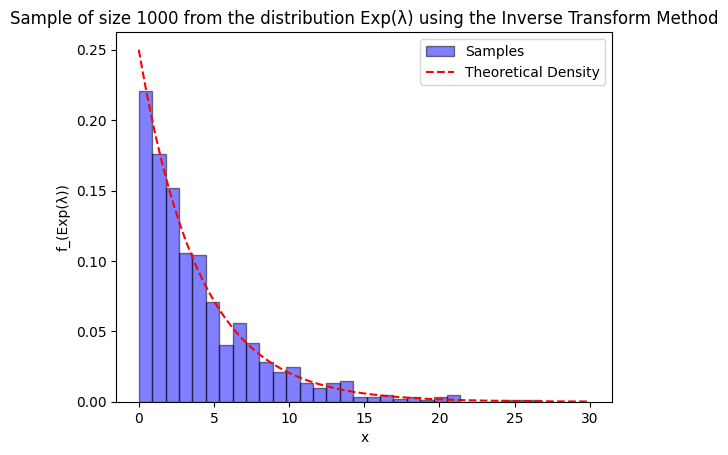

In [ ]:
lmbda = 0.25
def inverse_transform(lmbda, x):
    return -np.log(1 - x) / lmbda
x = np.random.rand(1000)
samples = inverse_transform(lmbda, x)
plt.hist(samples, bins=30, density=True, edgecolor='black', alpha=0.5, label="Samples", color='b')
x = np.linspace(0, 30, 1000)
theoretical_density = lmbda * np.exp(-lmbda * x)
plt.plot(x, theoretical_density, color='red', linestyle='--', label="Theoretical Density")
plt.xlabel("x")
plt.ylabel("f_(Exp(λ))")
plt.title("Sample of size 1000 from the distribution Exp(λ) using the Inverse Transform Method")
plt.legend()
plt.show()


### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

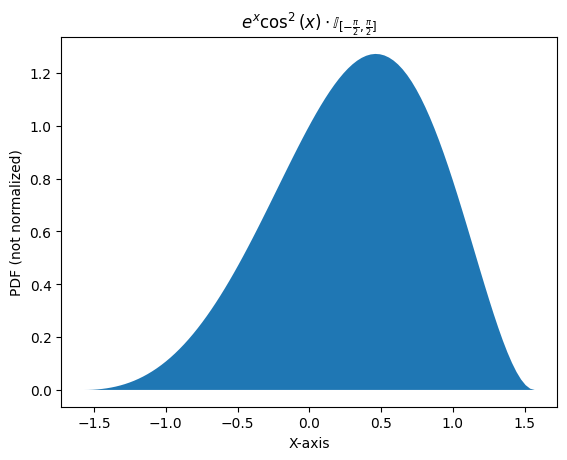

In [ ]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('X-axis')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

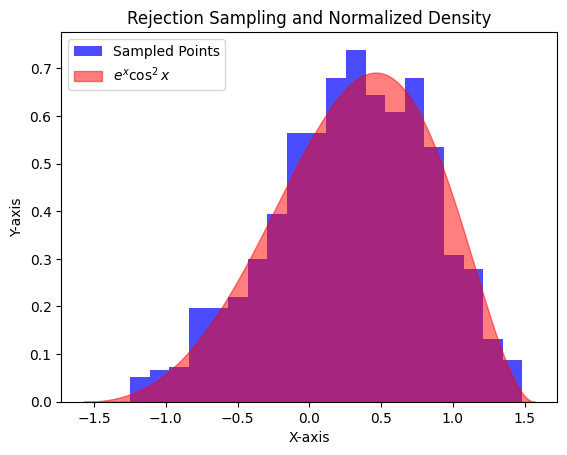

In [ ]:
#https://ru.wikipedia.org/wiki/Выборка_с_отклонением (немного теории)
n = 1000
f = lambda x: np.exp(x) * np.cos(x)**2
g = lambda x: 1 / np.pi

values = np.linspace(-np.pi/2, np.pi/2, 1000)
c = np.max(f(values) / g(values))+0.1

area, _ = quad(f, -np.pi/2, np.pi/2)

def normalized_density(x):
  return f(x) / area

samples = []

while len(samples) < n:
  x = np.random.uniform(-np.pi/2, np.pi/2)
  u = np.random.uniform(0, c * g(x))
  if u <= f(x):
      samples.append(x)

samples = np.array(samples)
plt.hist(samples, bins=20, density=True, color="b", alpha=.7, label="Sampled Points")
plt.fill_between(values, 0, normalized_density(values), color="r", alpha=.5, label=r"$e^x \cos^2x$")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Rejection Sampling and Normalized Density')
plt.legend()
plt.show()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

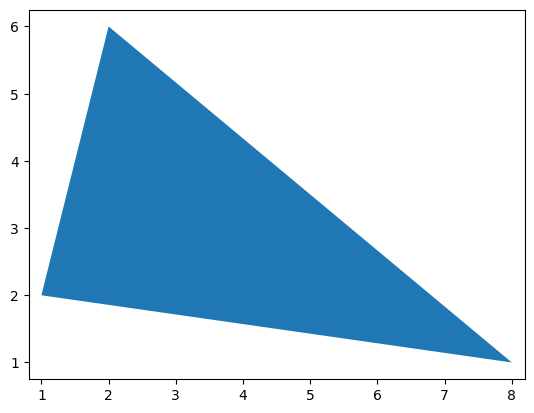

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

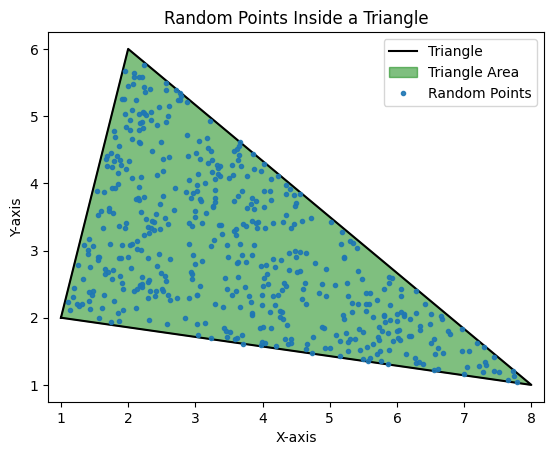

In [ ]:
a, b, c = np.array([[1, 2], [2, 6], [8, 1]])
n = 500

def gen_points(n, A, B, C):
    a = np.random.rand(n)
    b = np.random.rand(n)

    cond = a + b < 1
    a = np.where(cond, a, 1 - a)
    b = np.where(cond, b, 1 - b)

    return C + (A - C) * a[:, None] + (B - C) * b[:, None]

points = gen_points(n, a, b, c)

plt.plot(*zip(*[a, b, c, a]), label='Triangle', color='black')
plt.fill(*zip(*[a, b, c]), color='green', alpha=0.5, label='Triangle Area')
plt.plot(*points.T, 'o', label='Random Points', alpha=0.9, markersize=3)
plt.axis('equal')
plt.title('Random Points Inside a Triangle')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

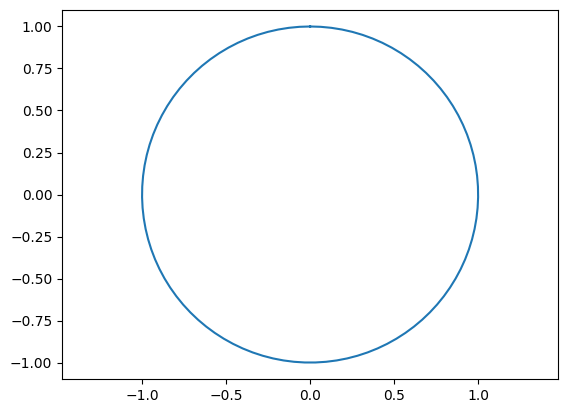

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

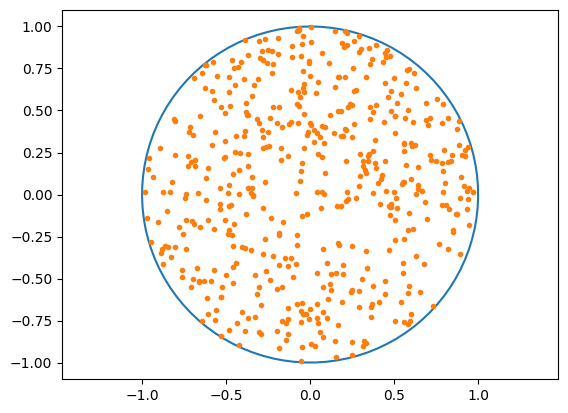

In [ ]:
n = 500

def gen_points(n):
    a = np.random.rand(n)
    b = np.random.rand(n)

    r = np.sqrt(a)
    t = 2 * np.pi * b

    return r[:, None] * np.column_stack((np.sin(t), np.cos(t)))

points = gen_points(n)

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.plot(*points.T, "o", markersize=3)

plt.axis("equal")
plt.show()

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

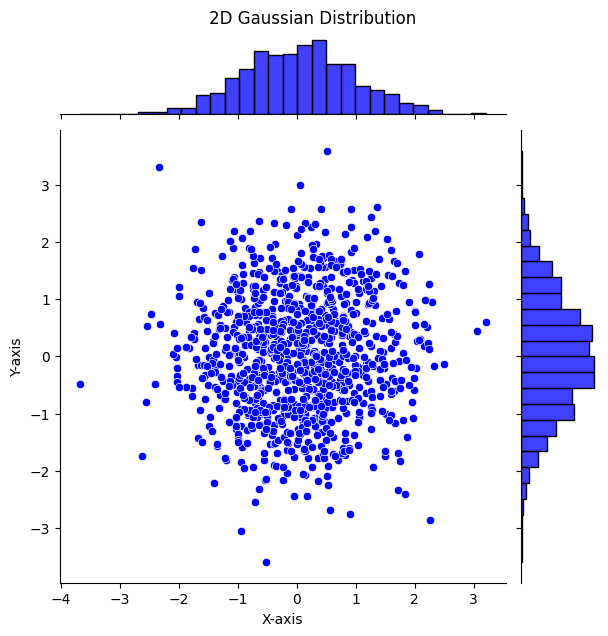

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

Сгенерированное среднее: [4.24724892 6.7298472 ]
Заданное среднее:    [4 7]

Сгенерированная ковариация:
 [[22.46962681 -6.40429643]
 [-6.40429643 39.90209207]]
Заданная ковариация:
 [[20 -4]
 [-4 40]]


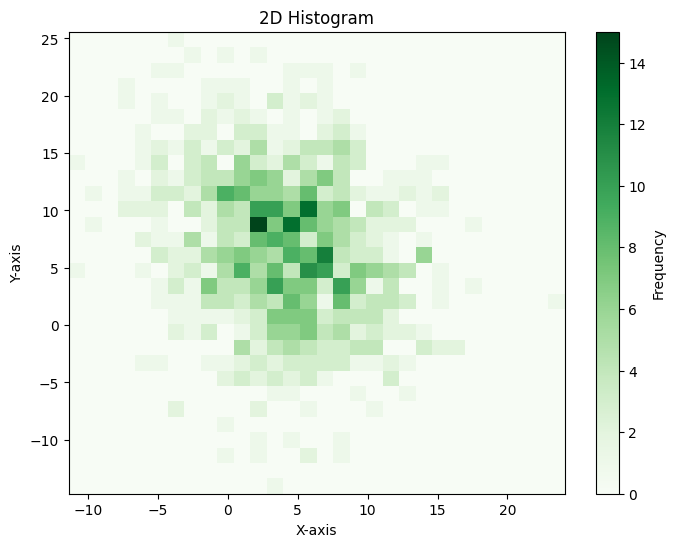

In [ ]:
mean = np.array([4, 7])
cov = np.array([[20, -4], [-4, 40]])
n = 1000

def gen_samples(mean, cov, n):
    xs, ys = [], []

    while len(xs) < n:
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)

        if x**2 + y**2 < 1:
            xs.append(x)
            ys.append(y)

    x, y = np.array(xs), np.array(ys)

    r = x**2 + y**2

    tmp = np.sqrt(-2 * np.log(r) / r)
    z = np.column_stack((x, y)) * tmp[:, None]
    k = np.linalg.cholesky(cov)
    return np.dot(z, k) + mean

samples = gen_samples(mean, cov, n)
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

print("Сгенерированное среднее:", sample_mean)
print("Заданное среднее:   ", mean)
print("\nСгенерированная ковариация:\n", sample_cov)
print("Заданная ковариация:\n", cov)

plt.figure(figsize=(8, 6))
plt.hist2d(samples[:, 0], samples[:, 1], bins=30, cmap='Greens')
plt.colorbar(label='Frequency')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Histogram')
plt.show()


### Problem 10*

Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [ ]:
# Your code here

# Basic distributions
- **Uniform distribution $\operatorname{U}[a, b]$**:
$$p(x) = \frac{1}{b-a}\cdot\mathbb{I}_{x\in[a, b]}$$

- **Exponential distribution $\operatorname{Exp}(\lambda)$**:
$$p(x) = \lambda e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Normal distribution $\mathcal{N}(\mu, \sigma^2)$**:
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- **Gamma distribution $\operatorname{Gamma}(\alpha, \lambda)$**:
$$p(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Beta distribution $\operatorname{Beta}(\alpha, \beta)$**:
$$p(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}\cdot\mathbb{I}_{x\in[0, 1]}$$

- **$\chi^2$ distribution with $k$ degrees of freedom $\chi^2(k)$**:
$$p(x) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}\cdot\mathbb{I}_{x\geqslant0}$$



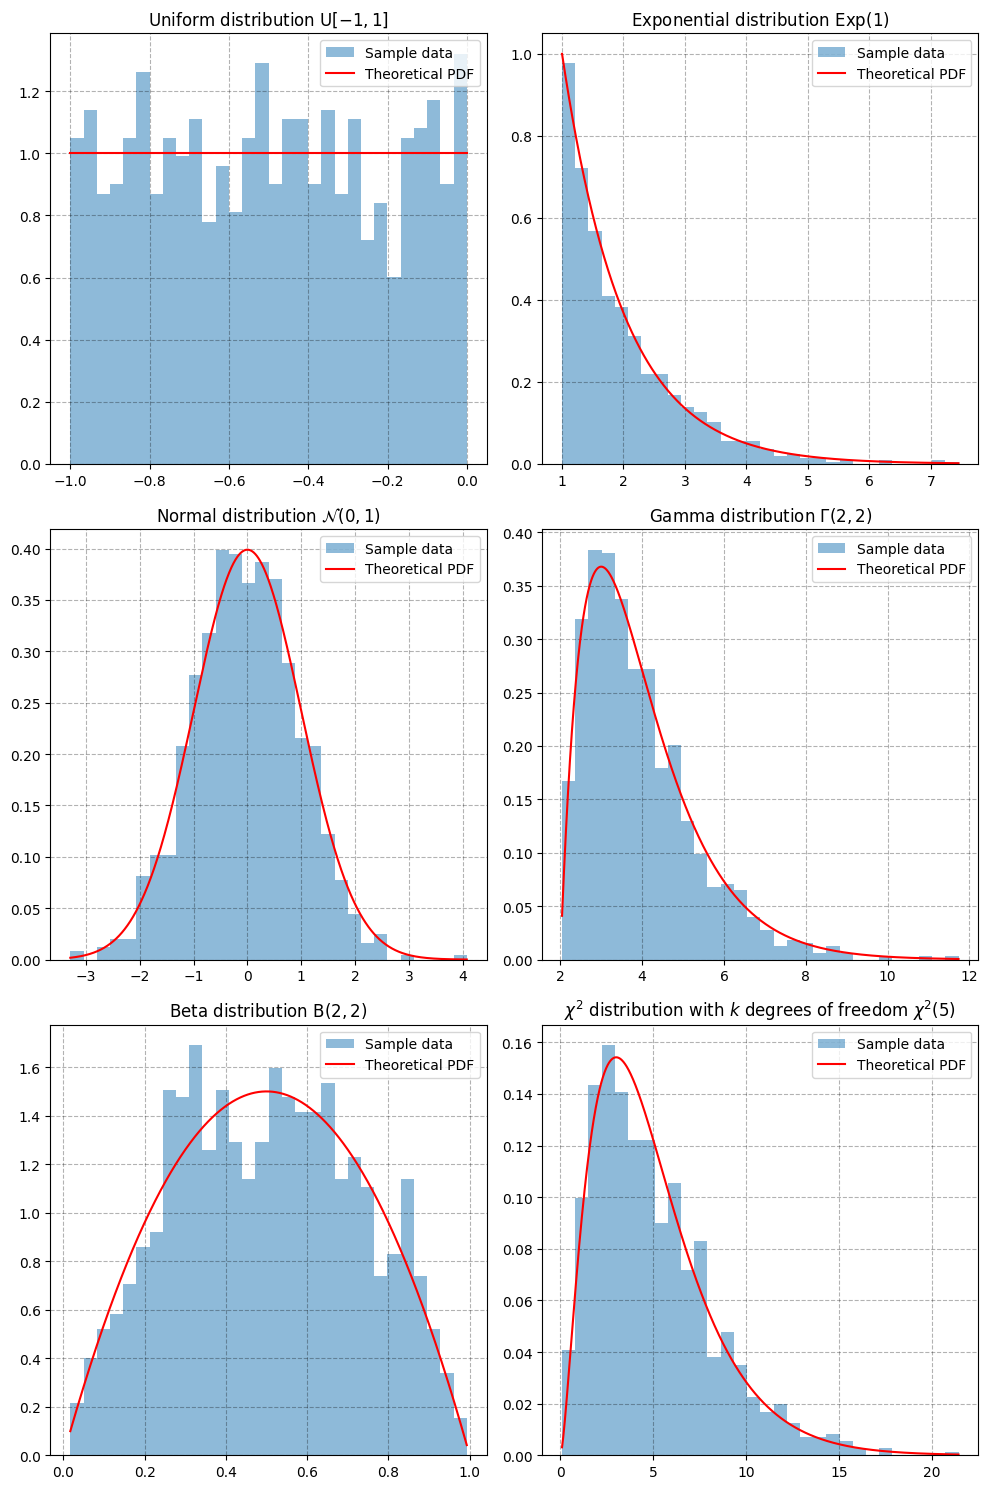

In [ ]:
# Define distributions and their parameters
distributions = [
    ("Uniform distribution $\\operatorname{U}[-1, 1]$", stats.uniform, (-1, 1)),
    ("Exponential distribution $\\operatorname{Exp}(1)$", stats.expon, (1,)),
    ("Normal distribution $\\mathcal{N}(0, 1)$", stats.norm, (0, 1)),
    ("Gamma distribution $\\Gamma(2, 2)$", stats.gamma, (2, 2)),
    ("Beta distribution $\\operatorname{B}(2, 2)$", stats.beta, (2, 2)),
    ("$\\chi^2$ distribution with $k$ degrees of freedom $\\chi^2(5)$", stats.chi2, (5,))
]

# Setup the figure and axes for a 2x3 subplot
fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Adjust figsize according to your needs
axs = axs.flatten()  # Flatten the array to easily iterate over it

for ax, (name, dist, params) in zip(axs, distributions):
    # Generate sample data
    data = dist.rvs(*params, size=1000)
    # Generate points for PDF
    x = np.linspace(min(data), max(data), 1000)
    pdf = dist.pdf(x, *params)

    # Plot histogram of sample data
    ax.hist(data, bins=30, density=True, alpha=0.5, label='Sample data')
    # Plot theoretical PDF
    ax.plot(x, pdf, 'r-', label='Theoretical PDF')
    ax.set_title(name)
    ax.legend()
    ax.grid(linestyle='--', color='black', alpha=0.3)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()
